# Assignment 1
## Telco Customer Churn Experiment
### by Alex McClead

### Summary
In this notebook I review the Telco Customer data and after cleaning it and engineering the fetures, I create two Models to predict customer Churn.

Churn refers to customers leaving a business and can negatively impact the overall growth of a business. Also, it is usually much easier to keep a customer, than to bring in new ones. This means identifying and addressing customer concerns before they leave is more efficent than trying to bring them back. 


### Data overview:
While working on the data I transformed some of it into numerical repersentations. Below are the Column headers and their value changes.

#### Data Transforms:
Gender
* Male = 0
* Female = 1

InternetService
* No = 0 
* DSL = 1
* Fiber Optic = 2

OnlineSecurity, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

* No internet service = 0
* No = 1
* Yes = 2

MultipleLines
* No phone service = 0
* No = 1
* Yes = 2

Contract
* Month-to-month = 0
* One year = 1
* Two year = 2

PaymentMethod
* Electronic check = 0
* Mailed check = 1
* Bank transfer (automatic) = 2
* Credit card (automatic) = 3

In [1]:
#Basic imports that I'm using
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
#csv pull for my data
ds = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
ds

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
#Looking over the data I have a lot of Objects that I can convert
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#No missing values (There are but I can't see that here)
ds.count().sort_values()

customerID          7043
MonthlyCharges      7043
PaymentMethod       7043
PaperlessBilling    7043
Contract            7043
StreamingMovies     7043
StreamingTV         7043
TechSupport         7043
DeviceProtection    7043
TotalCharges        7043
OnlineBackup        7043
InternetService     7043
MultipleLines       7043
PhoneService        7043
tenure              7043
Dependents          7043
Partner             7043
SeniorCitizen       7043
gender              7043
OnlineSecurity      7043
Churn               7043
dtype: int64

In [5]:
# Still cant find them. Turned out Total Charges had " "
ds.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
#Changed gender into int rep
print(ds.gender.unique())
ds.gender.replace(["Female", "Male"], [1, 0], inplace=True)

['Female' 'Male']


In [7]:
#Changed InternetService into int rep
ds.InternetService.unique()
ds.InternetService.replace(['DSL', 'Fiber optic', 'No'], [1,2,0], inplace=True)

In [8]:
# More data cleaning and feature engineering
binary_list = [ds.OnlineSecurity,
ds.DeviceProtection,
ds.TechSupport,
ds.StreamingTV,
ds.StreamingMovies,
ds.OnlineBackup]

for elm in binary_list:
    print(elm.unique())
    elm.replace(['No', 'Yes', 'No internet service'], [1,2,0], inplace=True)

['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']


In [9]:
odd_list = [ds.MultipleLines,
ds.Contract,
ds.PaymentMethod]

for elm in odd_list:
    elm_list = list(elm.unique())
    index_list = list(range(len(elm_list)))
    print(elm_list, index_list)
    elm.replace(elm_list, index_list, inplace=True)


['No phone service', 'No', 'Yes'] [0, 1, 2]
['Month-to-month', 'One year', 'Two year'] [0, 1, 2]
['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'] [0, 1, 2, 3]


In [10]:
bools = [ds.Partner, ds.Dependents, ds.PhoneService, ds.PaperlessBilling, ds.Churn]

for bo in bools:
    print(bo.unique())
    bo.replace(["No","Yes"], [False,True], inplace=True)
    bo.astype('bool')


['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']


In [11]:
mean = pd.to_numeric(ds[ds["TotalCharges"] != " "].TotalCharges).mean()
ds['TotalCharges'].replace(" ", mean, inplace=True)
ds.TotalCharges = pd.to_numeric(ds.TotalCharges)
ds.TotalCharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

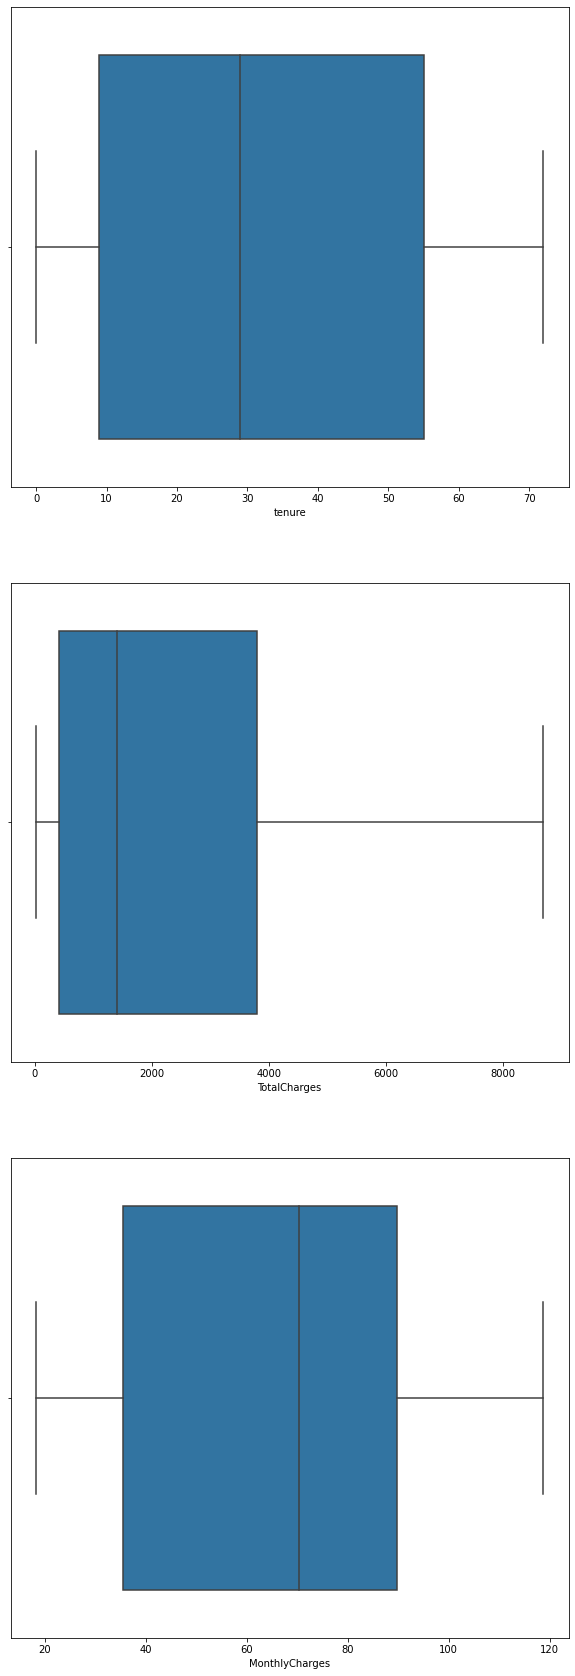

In [12]:
# Now that the data has been Encoded I'm going to look for outliers

fig, axes = plt.subplots(nrows=3,ncols=1)
fig.set_size_inches(10, 30)
check_cols = ["tenure", "TotalCharges", "MonthlyCharges"]

for i, col in enumerate(check_cols):
    sn.boxplot(x=ds[col], ax=axes[i])

<AxesSubplot:xlabel='TotalCharges'>

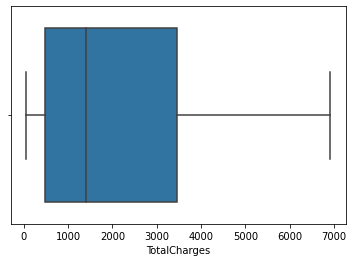

In [13]:
# Found Total Charges had some outliers so I did a quartile contraction. Helped a bit
upper_lim = ds['TotalCharges'].quantile(.95)
lower_lim = ds['TotalCharges'].quantile(.05)

ds = ds[(ds['TotalCharges'] < upper_lim) & (ds['TotalCharges'] > lower_lim)]

sn.boxplot(x=ds["TotalCharges"])

In [14]:
# Since the numbers where large I used a standard scaler to make them small
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ds['TotalCharges'] = ss.fit_transform(ds[['TotalCharges']])

<AxesSubplot:>

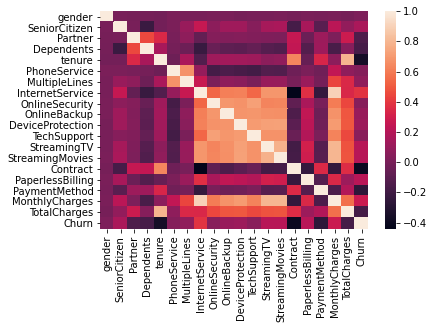

In [15]:
# Looking at the heat map, tenure,InternetService, and Contract have some of the largest corelations with churn
#(why is gender and tenure lower case compared to everything else)
sn.heatmap(ds.corr())

In [16]:
# Making training sets. 
X = ds.drop(["customerID","Churn"], axis=1)
y = ds["Churn"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [17]:
# setting up MLFlow server connection
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("Assignment1")

In [18]:
# Imported Models I'll use
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

Inside MLFlow Run with Run_id `4c02b8a03a444ba6a870dc8794ba3bc5` exp_id `1`


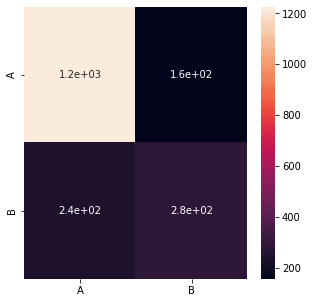

In [19]:
# Tested Logistic Regression First. Worked Pretty Well.

with mlflow.start_run(run_name="Basic Logistic Experiment") as run:
    log_reg = LogisticRegression()
    log_reg.fit(x_train, y_train)
    y_pred = log_reg.predict(x_test)
    
    mlflow.sklearn.log_model(log_reg, "logistic-regression-model")
    
    cm = metrics.confusion_matrix(y_test, y_pred)
    
    score = log_reg.score(x_test, y_test)
    
    df_cm = pd.DataFrame(cm, index = ["A", "B"],
                  columns = ["A", "B"])
    plt.figure(figsize = (5,5))
    sn.heatmap(df_cm, annot=True)
    plt.savefig("Confusion Matrix LogReg")
    mlflow.log_artifact("Confusion Matrix LogReg.png")
        
    mlflow.log_metric("score", score)
    
    runID = run.info.run_uuid
    experimentID = run.info.experiment_id
    print(f"Inside MLFlow Run with Run_id `{runID}` exp_id `{experimentID}`")

In [20]:
# Continued with RandomForest Regressor. Didn't turn out as well
with mlflow.start_run(run_name="Basic RF Experiment") as run:
    ran_for = RandomForestRegressor()
    ran_for.fit(x_train, y_train)
    y_pred = ran_for.predict(x_test)
    
    mlflow.sklearn.log_model(ran_for, "rf-model")
        
    score = ran_for.score(x_test, y_test)
        
    mlflow.log_metric("score", score)
    
    runID = run.info.run_uuid
    experimentID = run.info.experiment_id
    print(f"Inside MLFlow Run with Run_id `{runID}` exp_id `{experimentID}`")

Inside MLFlow Run with Run_id `8d8b6e747d2c46aa8f52259845873caa` exp_id `1`
